# **Instagram  Fake Account Detection**

The goal of the analysis is to find insights into the characteristics of Instagram fake accounts, such as common traits or patterns that differentiate them from real accounts. These insights will serve as the foundation for further analysis and modeling tasks aimed at developing a predictive model to detect fake Instagram accounts based on their characteristics.

In [ ]:
#Github File: https://github.com/maaheen/instagram_project/blob/main/insta_data.csv

In [2]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating plots
import seaborn as sns  # Seaborn for creating plots--> better graphs

In [7]:
# URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/maaheen/instagram_project/main/insta_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,yes,private,0,10,fake
1,324,4122.0,0,0,yes,public,4,15,fake
2,15,399.0,0,0,no,public,3,12,fake
3,14,107.0,0,1,yes,public,1,10,fake
4,264,4651.0,0,0,yes,public,0,14,fake


followers - Total count of followers for the account.

following - Total count of accounts being followed by the account.

bio_length - Number of characters present in the biography of the account

posts - Total count of posts uploaded by the account.

profile_picture - Indicates whether the account has a profile picture.

Private - Indicates whether the account is set to private or public mode.

uname_digits - Number of digits present in the username of the account.

uname_length - Number of characters present in the username of the account.

Fake - Indicates whether the account is real or fake.

In [5]:
# Print number of rows and columns in data
df.shape

(1194, 9)

In [ ]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   followers        1194 non-null   int64  
 1   following        1193 non-null   float64
 2   bio_length       1194 non-null   int64  
 3   posts            1194 non-null   int64  
 4   profile_picture  1194 non-null   object 
 5   Private          1194 non-null   object 
 6   uname_digits     1194 non-null   int64  
 7   uname_length     1194 non-null   int64  
 8   Fake             1194 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 84.1+ KB


In [ ]:
# 3--> int
# 3.2--> float
# object --> text values/string values

In [9]:
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,yes,private,0,10,fake
1,324,4122.0,0,0,yes,public,4,15,fake
2,15,399.0,0,0,no,public,3,12,fake
3,14,107.0,0,1,yes,public,1,10,fake
4,264,4651.0,0,0,yes,public,0,14,fake


In [10]:
df['following'].isnull()
#True,
#False

0       False
1       False
2       False
3       False
4       False
        ...  
1189    False
1190    False
1191    False
1192    False
1193    False
Name: following, Length: 1194, dtype: bool

In [11]:
df['following']

0       1937.0
1       4122.0
2        399.0
3        107.0
4       4651.0
         ...  
1189    1134.0
1190     149.0
1191     783.0
1192     517.0
1193     823.0
Name: following, Length: 1194, dtype: float64

In [52]:
# following
# 3
# 3
# 2
# 4
# 3
# unique values --> frequency
# 3-->3
# 2-->1
# 4--> 1

# x axis --> unique values
# y axis --> frequency


<Axes: xlabel='following', ylabel='Count'>

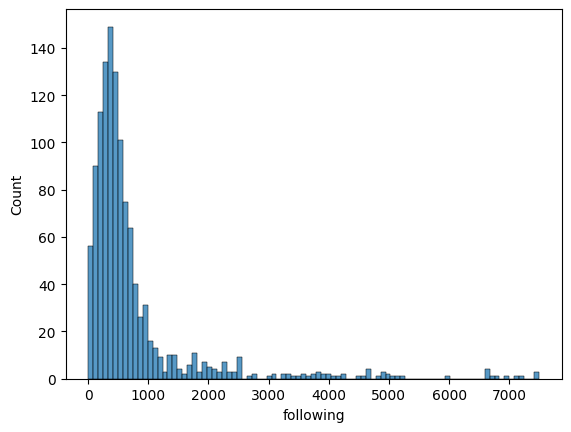

In [12]:
sns.histplot(df['following'])

In [ ]:
# marks
# 7, 5, 9, 99, 6
# 99--> outlier

# 8
# 5,6,7,9,99
# median marks = 7 #sort the data in asc order and take centre value
# avg marks --> 126/5 = 25--> is this good representation?
# # mean got messed up because of outliers
# # median is not messed up because of outliers

In [16]:
med = df['following'].median() #because there are outliers
df['following'] = df['following'].fillna(med)#replaces the null missig values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   followers        1194 non-null   int64  
 1   following        1194 non-null   float64
 2   bio_length       1194 non-null   int64  
 3   posts            1194 non-null   int64  
 4   profile_picture  1194 non-null   object 
 5   Private          1194 non-null   object 
 6   uname_digits     1194 non-null   int64  
 7   uname_length     1194 non-null   int64  
 8   Fake             1194 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 84.1+ KB


In [ ]:
df['following'] = df['following'].astype('int64') #change float to int for following column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   followers        1194 non-null   int64 
 1   following        1194 non-null   int64 
 2   bio_length       1194 non-null   int64 
 3   posts            1194 non-null   int64 
 4   profile_picture  1194 non-null   object
 5   Private          1194 non-null   object
 6   uname_digits     1194 non-null   int64 
 7   uname_length     1194 non-null   int64 
 8   Fake             1194 non-null   object
dtypes: int64(6), object(3)
memory usage: 84.1+ KB


In [19]:
# Code to print unique values for a column
df['Fake'].unique()

array(['fake', 'real'], dtype=object)

In [18]:
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,yes,private,0,10,fake
1,324,4122.0,0,0,yes,public,4,15,fake
2,15,399.0,0,0,no,public,3,12,fake
3,14,107.0,0,1,yes,public,1,10,fake
4,264,4651.0,0,0,yes,public,0,14,fake


In [19]:
#check shape
# check info, dtypes,
# check missing values,
# check for outliers
# check for unique values

In [20]:
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,yes,private,0,10,fake
1,324,4122.0,0,0,yes,public,4,15,fake
2,15,399.0,0,0,no,public,3,12,fake
3,14,107.0,0,1,yes,public,1,10,fake
4,264,4651.0,0,0,yes,public,0,14,fake


**# Hypothesis: Accounts with a higher number of followers tend to have a higher number of posts.**

<Axes: xlabel='followers', ylabel='posts'>

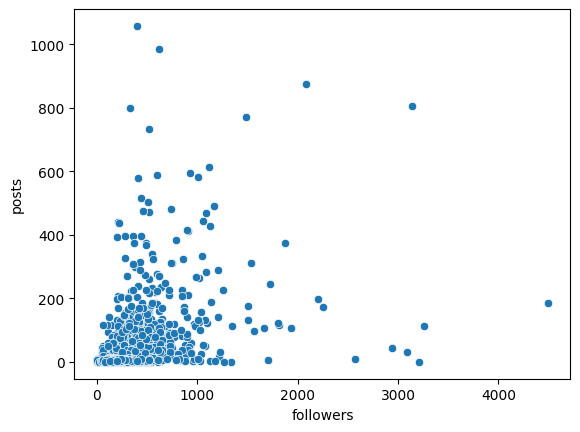

In [23]:
sns.scatterplot(data = df, x='followers',y ='posts')
#plt.scatter(df['followers',df['posts']])

In [ ]:
#Insight from above graph: Account having high number of followers tend to have low number of posts

**# Hypothesis: Accounts with less number of followers and a less number of posts are fake accounts**

<Axes: xlabel='followers', ylabel='posts'>

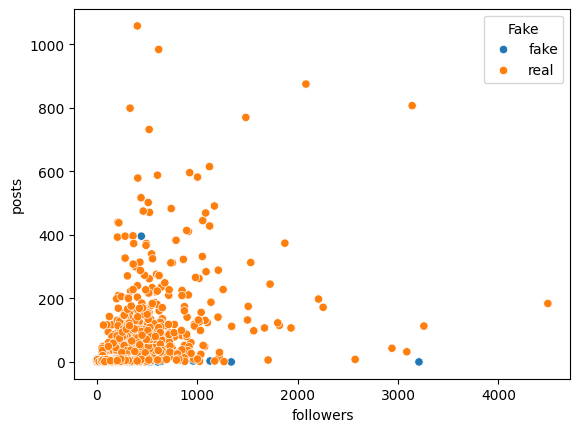

In [26]:
# Create a scatter plot to visualize the relationship between number of followers and number of posts,
# with different colors representing real and fake accounts
sns.scatterplot(data = df, x='followers',y ='posts',hue='Fake')
#segment the data based on Fake columm


**# Hypothesis: Accounts with less number of followers and a high number of following are fake accounts**

<Axes: xlabel='followers', ylabel='following'>

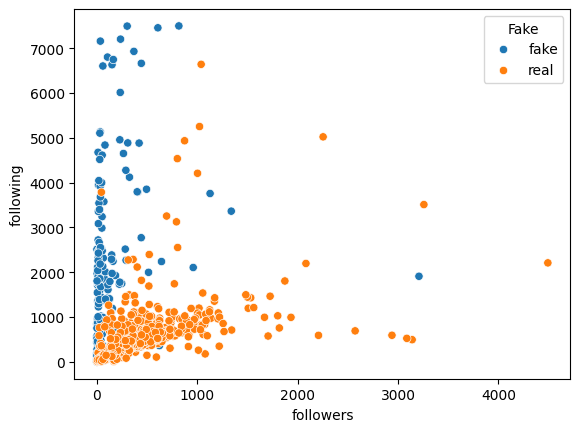

In [27]:
# Create a scatter plot to visualize the relationship between number of followers and number of posts,
# with different colors representing real and fake accounts
sns.scatterplot(data=df, x='followers', y='following', hue='Fake')


**Hypothesis: The presence of a profile picture is more common in real Instagram accounts compared to fake accounts.**

In [29]:
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,yes,private,0,10,fake
1,324,4122.0,0,0,yes,public,4,15,fake
2,15,399.0,0,0,no,public,3,12,fake
3,14,107.0,0,1,yes,public,1,10,fake
4,264,4651.0,0,0,yes,public,0,14,fake


<Axes: xlabel='profile_picture', ylabel='count'>

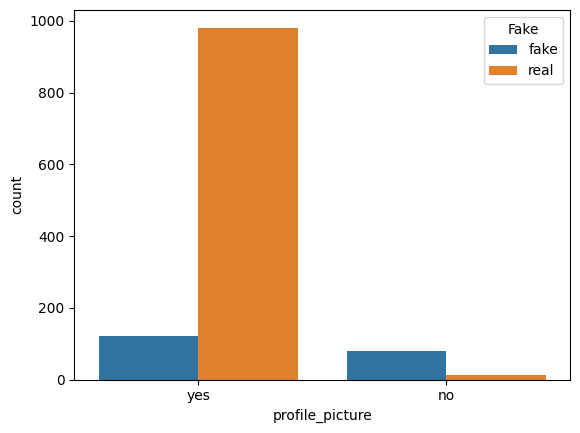

In [31]:
sns.countplot(data=df,x='profile_picture',hue='Fake')

# Profile, FaKE
# Yes    ,  R
# Yes,     R
# No,       F
# Yes,      R


# Fake --> orange
# real--> blue

# X--> PROFILE
# Y--> Count
# HUE = 'FAKE'

# 3,   1
# Yes, NO


# 3 YES
# 3 Real, 0 fAKE

# 1NO
# 0 REAL, 1 FAKE


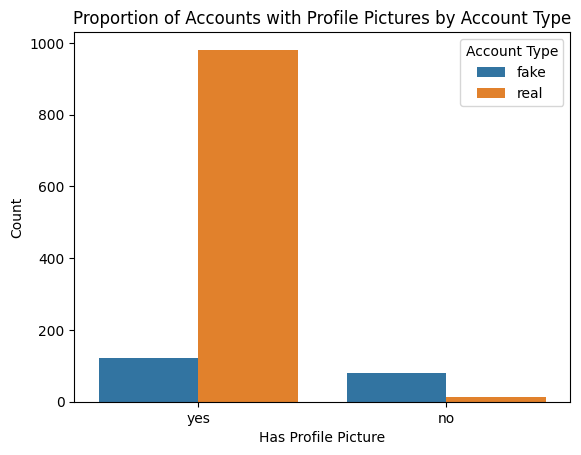

In [ ]:
# Proportion of Accounts with Profile Pictures
sns.countplot(data=df, x='profile_picture', hue='Fake')

**Hypothesis: Private Instagram accounts are more likely to be real compared to fake accounts.**

<Axes: xlabel='Private', ylabel='count'>

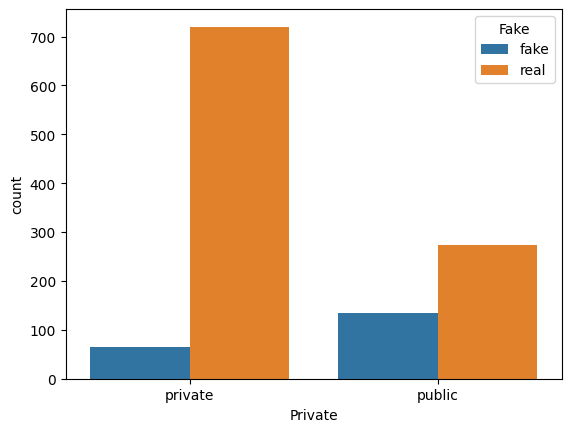

In [32]:
# Proportion of Private Accounts
sns.countplot(data=df, x='Private', hue='Fake')

In [32]:
# ML --> Classify -->> real/fake

# **Let's prepare the data for ML**

In [33]:
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,yes,private,0,10,fake
1,324,4122.0,0,0,yes,public,4,15,fake
2,15,399.0,0,0,no,public,3,12,fake
3,14,107.0,0,1,yes,public,1,10,fake
4,264,4651.0,0,0,yes,public,0,14,fake


In [36]:
# Perform some feature engineering
# Create a binary feature indicating whether the account has a profile picture or not
df['profile_picture'] = df['profile_picture'].replace({"yes":1,"no":0})

# Create a binary feature indicating whether the account is private or not
df['Private'] = df['Private'].replace({"private":1,"public":0})

# Create a binary feature indicating whether the account is fake or real
df['Fake'] = df['Fake'].replace({"fake":1,"real":0})


#binary encoding
df.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,Fake
0,25,1937.0,0,0,1,1,0,10,1
1,324,4122.0,0,0,1,0,4,15,1
2,15,399.0,0,0,0,0,3,12,1
3,14,107.0,0,1,1,0,1,10,1
4,264,4651.0,0,0,1,0,0,14,1


In [35]:
df.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   followers        1194 non-null   int64  
 1   following        1194 non-null   float64
 2   bio_length       1194 non-null   int64  
 3   posts            1194 non-null   int64  
 4   profile_picture  1194 non-null   int64  
 5   Private          1194 non-null   int64  
 6   uname_digits     1194 non-null   int64  
 7   uname_length     1194 non-null   int64  
 8   Fake             1194 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 84.1 KB


In [43]:
# Split the data into features (X) and target variable (y)
X = df.drop('Fake', axis=1)  # Features (independent variables) - dropping the 'Fake' column
y = df['Fake']  # Target variable (dependent variable) - 'Fake' column

# X contains all columns except 'Fake', which are the features used for prediction
# y contains only the 'Fake' column, which is the target variable to be predicted

In [ ]:
# data should be numerical
# no missing values
# define y and x

# .fit() #understand how y and x are related

# #training data --> 80% rows
# #testing data --> 20% rows

# ML --> mathematical eqn
#  Fake = 2*followers + 3*following



In [ ]:
# student --> learn from book

# student attempts an exam

# faculty evaluates the answers
# decide whether student passed or not

In [ ]:
# ML --> learn from training data

# ML attempts an testing data --> answers

# python evaluates the answers


# 8/10
# decide whether student passed or not 80%

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train: Feature values for training the model
# X_test: Feature values for testing the model
# y_train: Target variable values for training the model
# y_test: Target variable values for testing the model
# test_size=0.2: 20% of the data will be used for testing, and 80% will be used for training

In [45]:
X_train.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length
100,643,2240.0,0,2,1,0,1,11
10,235,7202.0,0,1,1,1,2,14
968,225,307.0,0,74,1,1,0,8
28,0,126.0,0,0,1,1,0,5
241,335,353.0,26,2,1,1,0,14


In [46]:
y_train

100     1
10      1
968     0
28      1
241     0
       ..
366     0
1006    0
563     0
772     0
559     0
Name: Fake, Length: 955, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression
#classfy --> understand how y and x are related --> to classify --> fake/real
# Initialize the Logistic Regression classifier
clf = LogisticRegression() #ACTIVATE

# Train the classifier on the training data
clf.fit(X_train, y_train) #LEARNING X AND Y --? FIT TRAIN -->

# Predict the labels for the test set
y_pred = clf.predict(X_test) #GENERATE ANSWERS ON XTEST

# clf: Logistic Regression classifier trained on the training data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
y_pred #predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [49]:
y_test #original answers

170     1
969     0
418     0
791     0
208     0
       ..
537     0
99      1
1075    0
631     0
1040    0
Name: Fake, Length: 239, dtype: int64

In [50]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [51]:
X_test.head()

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length
170,85,1401.0,130,9,1,0,3,16
969,237,492.0,0,21,1,1,4,10
418,116,187.0,0,0,1,1,0,12
791,964,861.0,29,9,1,1,0,8
208,172,227.0,51,10,1,0,0,10


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# y_test: True labels for the test set
# y_pred: Predicted labels for the test set
# accuracy: Accuracy score of the model on the test set

Accuracy: 0.9623430962343096


In [ ]:
# 96% time your predictions are correct

# **Additional Read**

# Generate predictions on new Instagram accounts data to find which ones are fake

In [ ]:
# URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/maaheen/instagram_project/main/new_data.csv'

# Read the CSV file into a pandas DataFrame
new_df = pd.read_csv(url)

# Display the rows of the DataFrame
new_df

,followers,following,bio_length,posts,profile_picture,Private,uname_digits,uname_length,digits_uname_ratio
0,2732,314,333,448,no,public,4,6,0.666667
1,9845,705,72,850,yes,public,5,12,0.416667
2,3264,486,265,99,no,private,6,14,0.428571
3,4859,551,404,984,no,public,8,14,0.571429
4,9225,87,115,177,no,private,17,8,2.125000
5,7891,174,464,755,no,public,15,11,1.363636
6,4373,600,243,797,yes,private,4,12,0.333333
7,5874,849,197,659,no,private,9,16,0.562500
8,6744,677,335,147,yes,private,10,19,0.526316
9,3468,537,431,910,yes,private,1,7,0.142857


In [ ]:
# Create a binary feature indicating whether the account has a profile picture or not
new_df['profile_picture'] = new_df['profile_picture'].replace({"yes":1,"no":0})

# Create a binary feature indicating whether the account is private or not
new_df['Private'] = new_df['Private'].replace({"private":1,"public":0})

# Create a binary feature indicating whether the account is fake or real
df['Fake'] = df['Fake'].replace({"fake":1,"real":0})

In [ ]:
#Generate predictions on new data
clf.predict(new_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf.coef_

array([[-0.00695579,  0.00203803, -0.00881904, -0.03529073, -1.3736837 ,
        -0.83286233,  0.38462823,  0.0030249 ,  0.07010341]])

In [ ]:
clf.coef_[0]

array([-0.00695579,  0.00203803, -0.00881904, -0.03529073, -1.3736837 ,
       -0.83286233,  0.38462823,  0.0030249 ,  0.07010341])

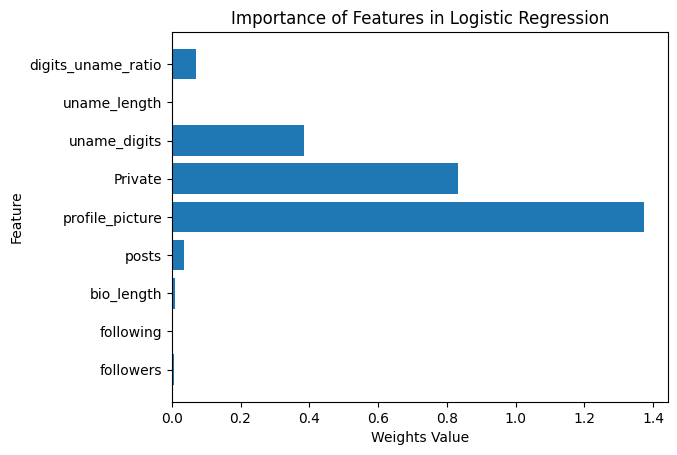

In [ ]:
# Get coefficients of the logistic regression model
weights = clf.coef_[0]
weights = np.abs(weights)

# Plot important features
plt.barh(X.columns, weights)
plt.xlabel('Weights Value')
plt.ylabel('Feature')
plt.title('Importance of Features in Logistic Regression')
plt.show()

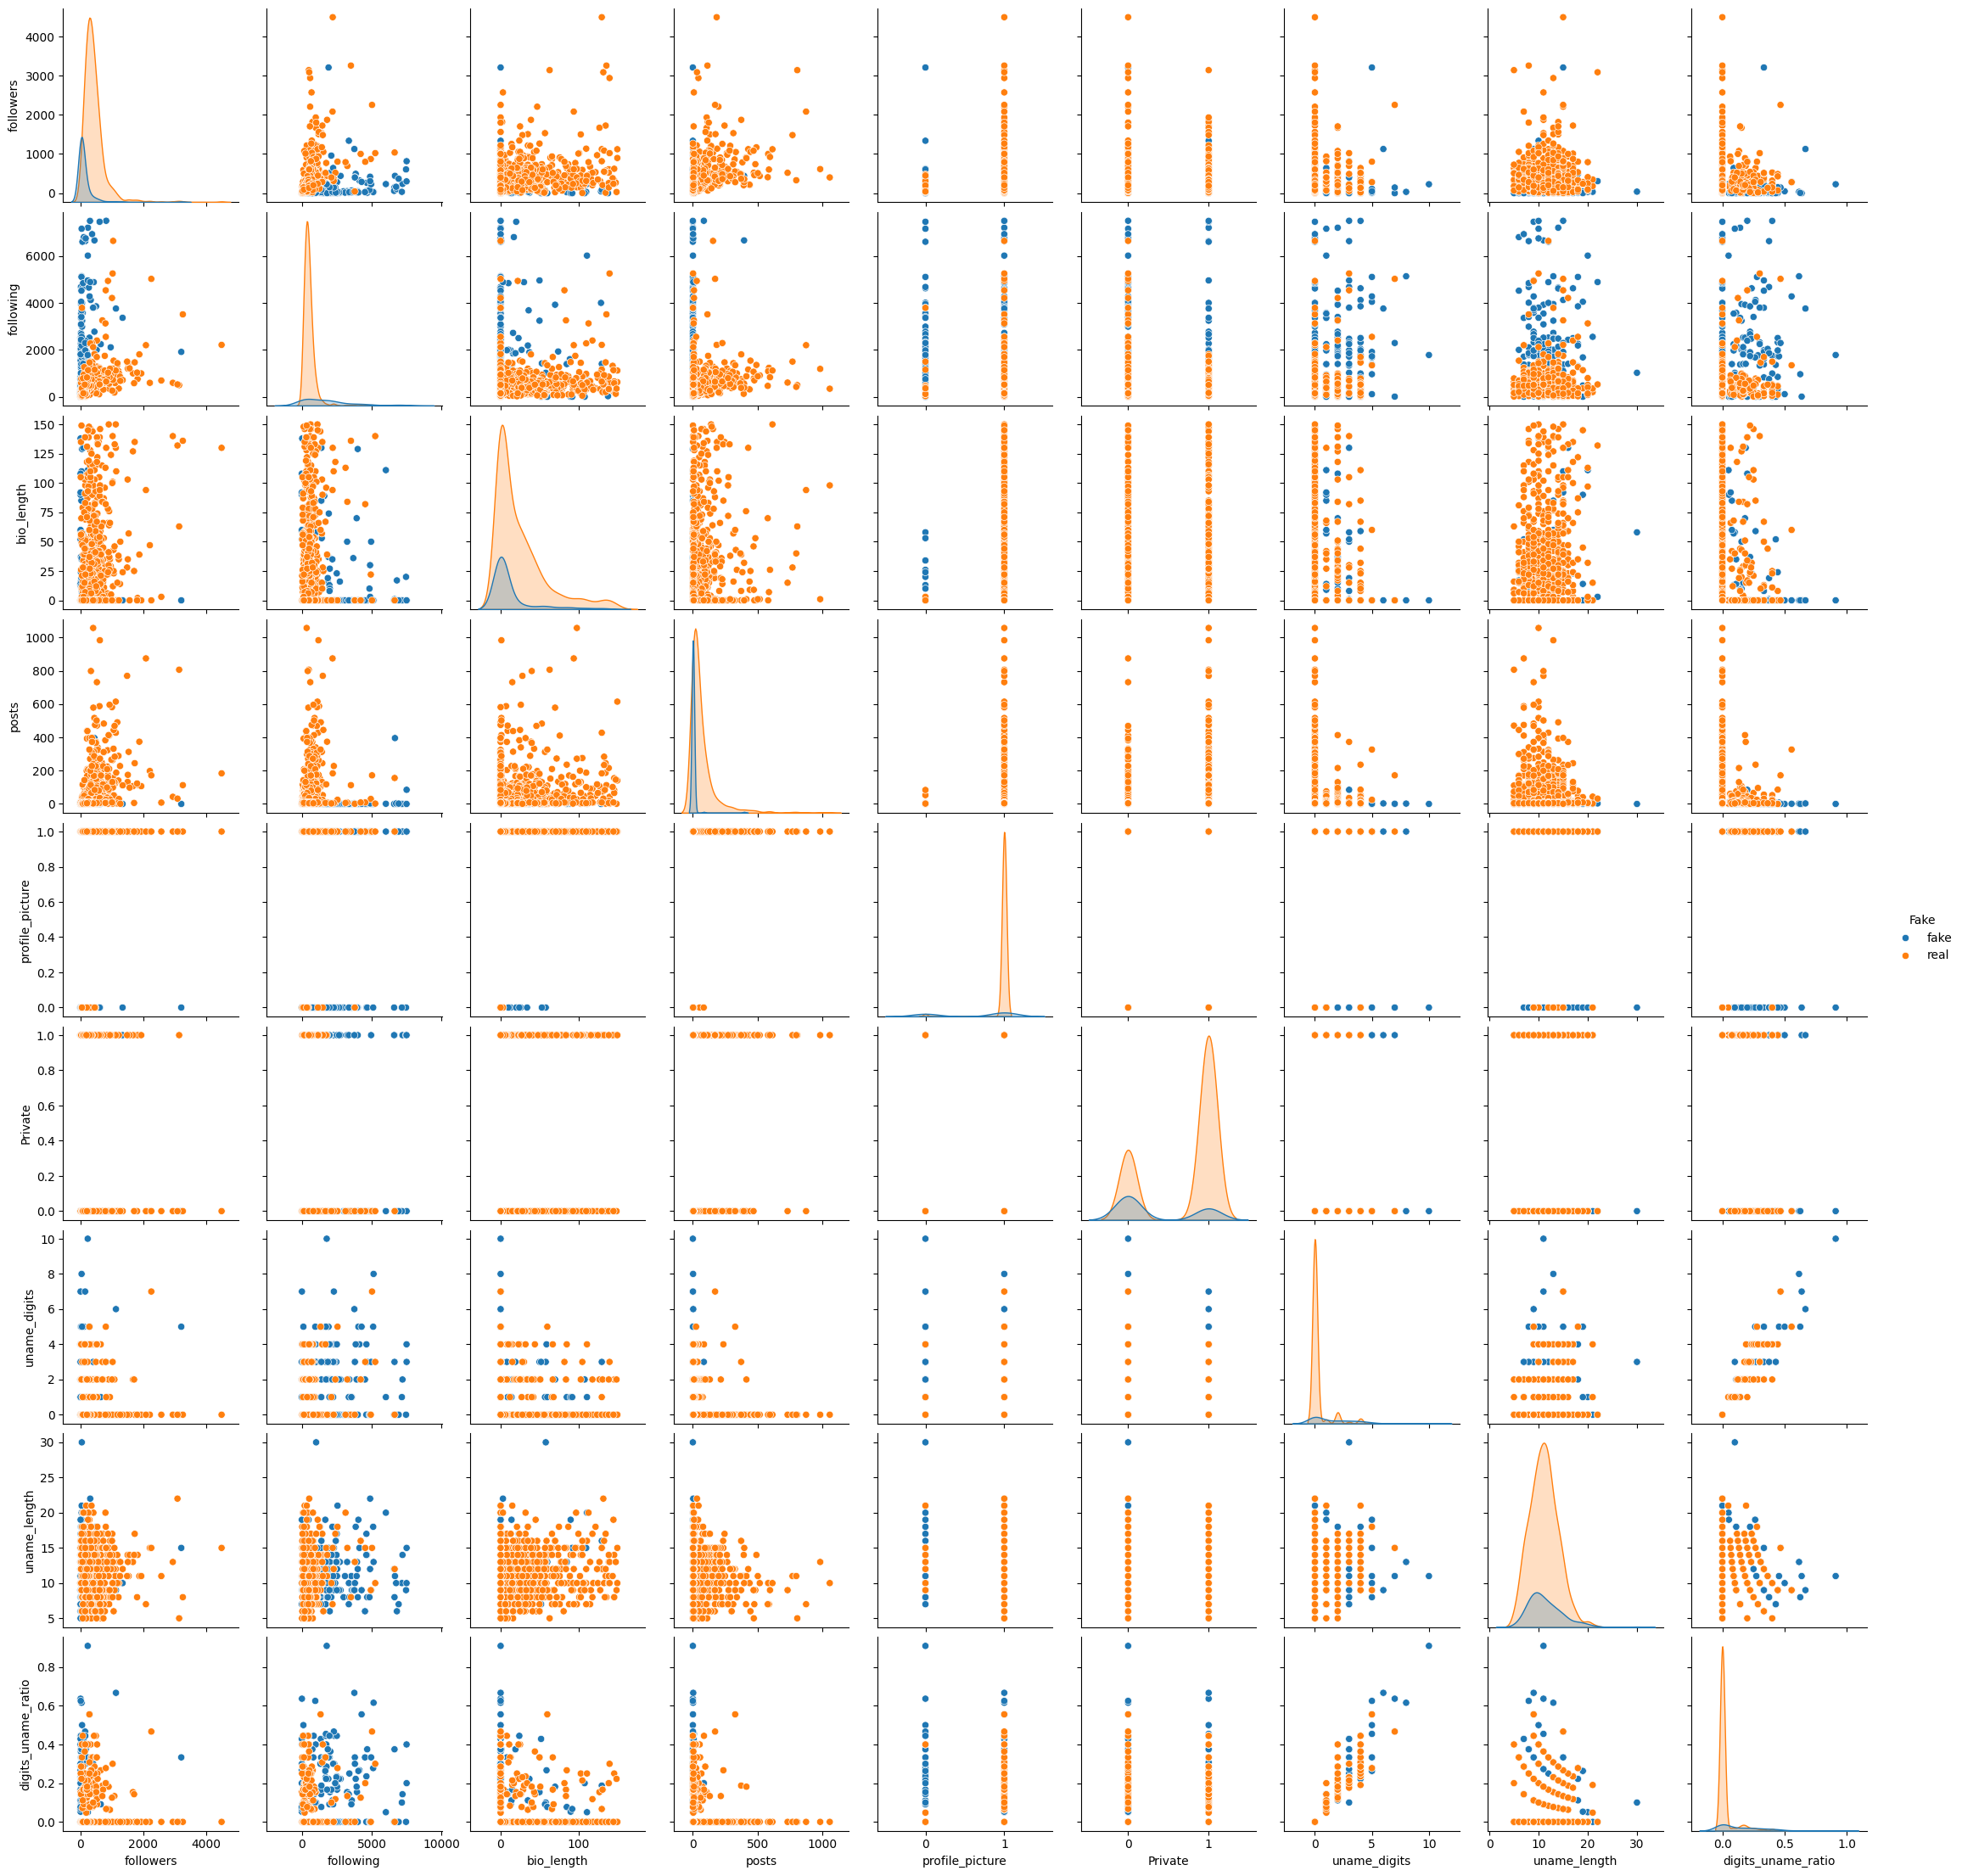

In [ ]:
#Generate a pair plot
sns.pairplot(df,hue='Fake')
plt.show()

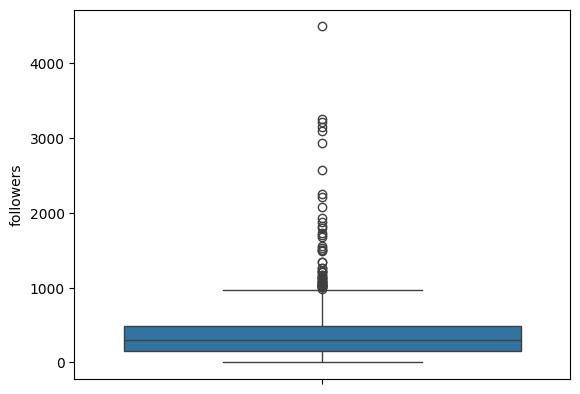

In [ ]:
#Outlier Handling
sns.boxplot(df['followers'])
plt.show()